<a href="https://colab.research.google.com/github/freirepablo/Mango_Leaf_Disease_Classification/blob/main/Xception_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
IMAGE_SIZE = [224, 224]
batch_size = 32

In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Treino'
val_path = '/content/drive/MyDrive/Dataset/Validação'

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

val_generator = test_datagen.flow_from_directory(val_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 2950 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
# Carregar modelo Xception com pesos pré-treinados
base_model = Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

# Congelar camadas convolucionais do modelo base
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-10:]:
    layer.trainable = True

# Adicionar camadas personalizadas para a tarefa de classificação
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Criar modelo final
model = Model(inputs=base_model.input, outputs=output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")

history = model.fit(train_generator, epochs=35, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/35
93/93 [==============================] - ETA: 0s - loss: 0.2043 - accuracy: 0.9353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 54s 529ms/step - loss: 0.2043 - accuracy: 0.9353 - val_loss: 0.3235 - val_accuracy: 0.9000
Epoch 2/35
93/93 [==============================] - 48s 520ms/step - loss: 0.0716 - accuracy: 0.9763 - val_loss: 0.1771 - val_accuracy: 0.9488
Epoch 3/35
93/93 [==============================] - 48s 518ms/step - loss: 0.0642 - accuracy: 0.9814 - val_loss: 0.1390 - val_accuracy: 0.9525
Epoch 4/35
93/93 [==============================] - 48s 515ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.0426 - val_accuracy: 0.9837
Epoch 5/35
93/93 [==============================] - 48s 519ms/step - loss: 0.0408 - accuracy: 0.9895 - val_loss: 0.0179 - val_accuracy: 0.9950
Epoch 6/35
93/93 [==============================] - 48s 512ms/step - loss: 0.0366 - accuracy: 0.9908 - val_loss: 0.1390 - val_accuracy: 0.9663
Epoch 7/35
93/93 [==============================] - 47s 502ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.4961 - val_accuracy: 0.9262
Epoch 8/35

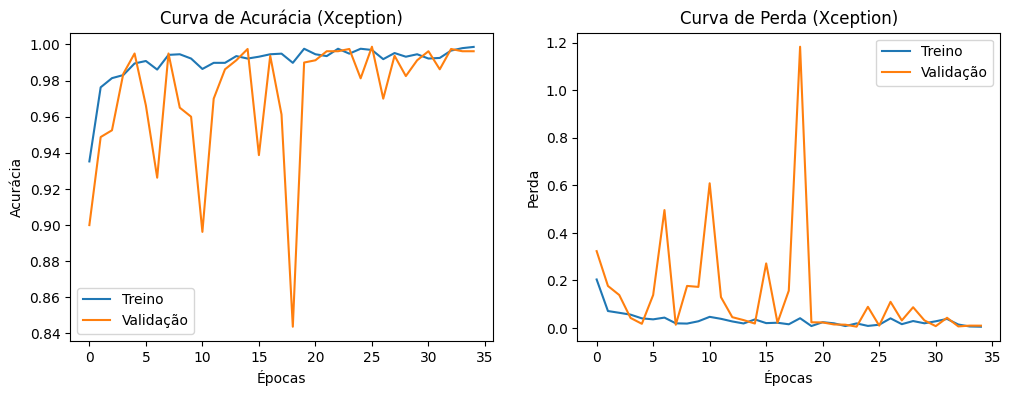

In [ ]:
# Plote as curvas de treino e teste
plt.figure(figsize=(12, 4))

# Plot da Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia (Xception)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot da Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (Xception)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Modelos_Treinados_2/xception_model_2.h5')

Found 374 images belonging to 8 classes.
12/12 [==============================] - 193s 17s/step


<Figure size 1000x800 with 0 Axes>

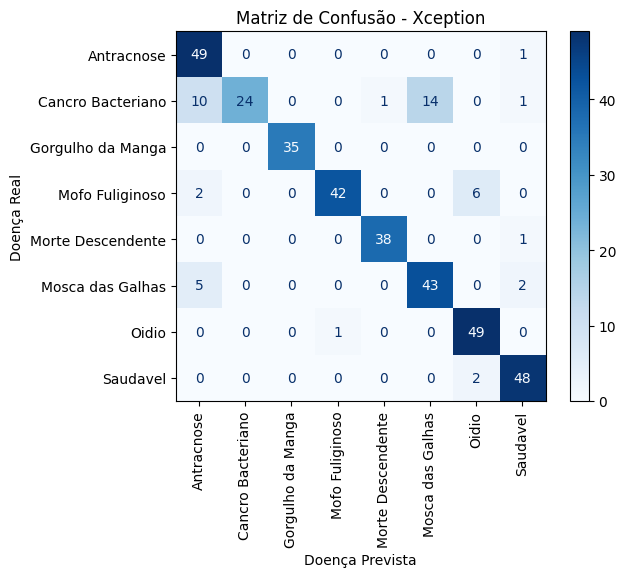

<Figure size 1000x800 with 0 Axes>

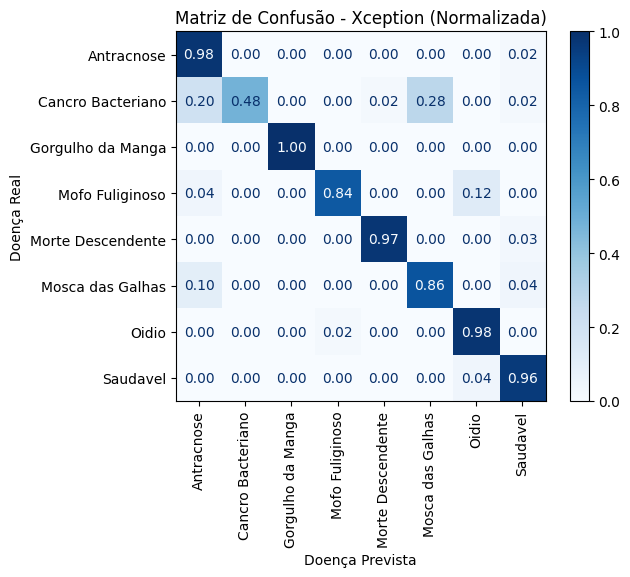

                   precision    recall  f1-score   support

       Antracnose       0.74      0.98      0.84        50
Cancro Bacteriano       1.00      0.48      0.65        50
Gorgulho da Manga       1.00      1.00      1.00        35
  Mofo Fuliginoso       0.98      0.84      0.90        50
Morte Descendente       0.97      0.97      0.97        39
 Mosca das Galhas       0.75      0.86      0.80        50
            Oidio       0.86      0.98      0.92        50
         Saudavel       0.91      0.96      0.93        50

         accuracy                           0.88       374
        macro avg       0.90      0.88      0.88       374
     weighted avg       0.90      0.88      0.87       374



In [ ]:
# Importe as bibliotecas necessárias
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import ConfusionMatrixDisplay

# Carregue o modelo treinado
trained_model = load_model("/content/drive/MyDrive/Modelos_Treinados_2/xception_model.h5")  # Certifique-se de ter o nome correto do arquivo do modelo salvo

# Defina o caminho para a pasta de teste
test_path = '/content/drive/MyDrive/Dataset/Teste'

# Crie um gerador de dados para o conjunto de teste
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(299,299),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

# Faça previsões no conjunto de teste
y_pred = trained_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

# Crie a matriz de confusão
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plote a matriz de confusão não normalizada com valores absolutos
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_mtx, display_labels=class_labels).plot(include_values=True, cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Xception')
plt.xticks(rotation=90)  # Adicionando rotação aos rótulos do eixo x
plt.xlabel('Doença Prevista')
plt.ylabel('Doença Real')
plt.show()

# Plote a matriz de confusão normalizada com percentuais
plt.figure(figsize=(10, 8))
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(confusion_mtx_normalized, display_labels=class_labels).plot(include_values=True, cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusão - Xception (Normalizada)')
plt.xticks(rotation=90)  # Adicionando rotação aos rótulos do eixo x
plt.xlabel('Doença Prevista')
plt.ylabel('Doença Real')
plt.show()

# Exiba métricas de classificação
print(classification_report(y_true, y_pred_classes, target_names=class_labels))